# <center> <h1>   🌲🌳🌲🌳🌲   🧑‍💻   🌲🌳🌲🌳🌲

### <center> Extra Trees is one of the ensemble algorithms of machine learning, which consists of several trees and combines predictions.

It is similar to the widely used random forest algorithm. It can often achieve the same or better results than a random forest algorithm.

When the random forest algorithm cuts a sub-dataset from the data, it uses the data from all columns
`EXTRA TREE` may remove the data from some column when getting a sub dataset

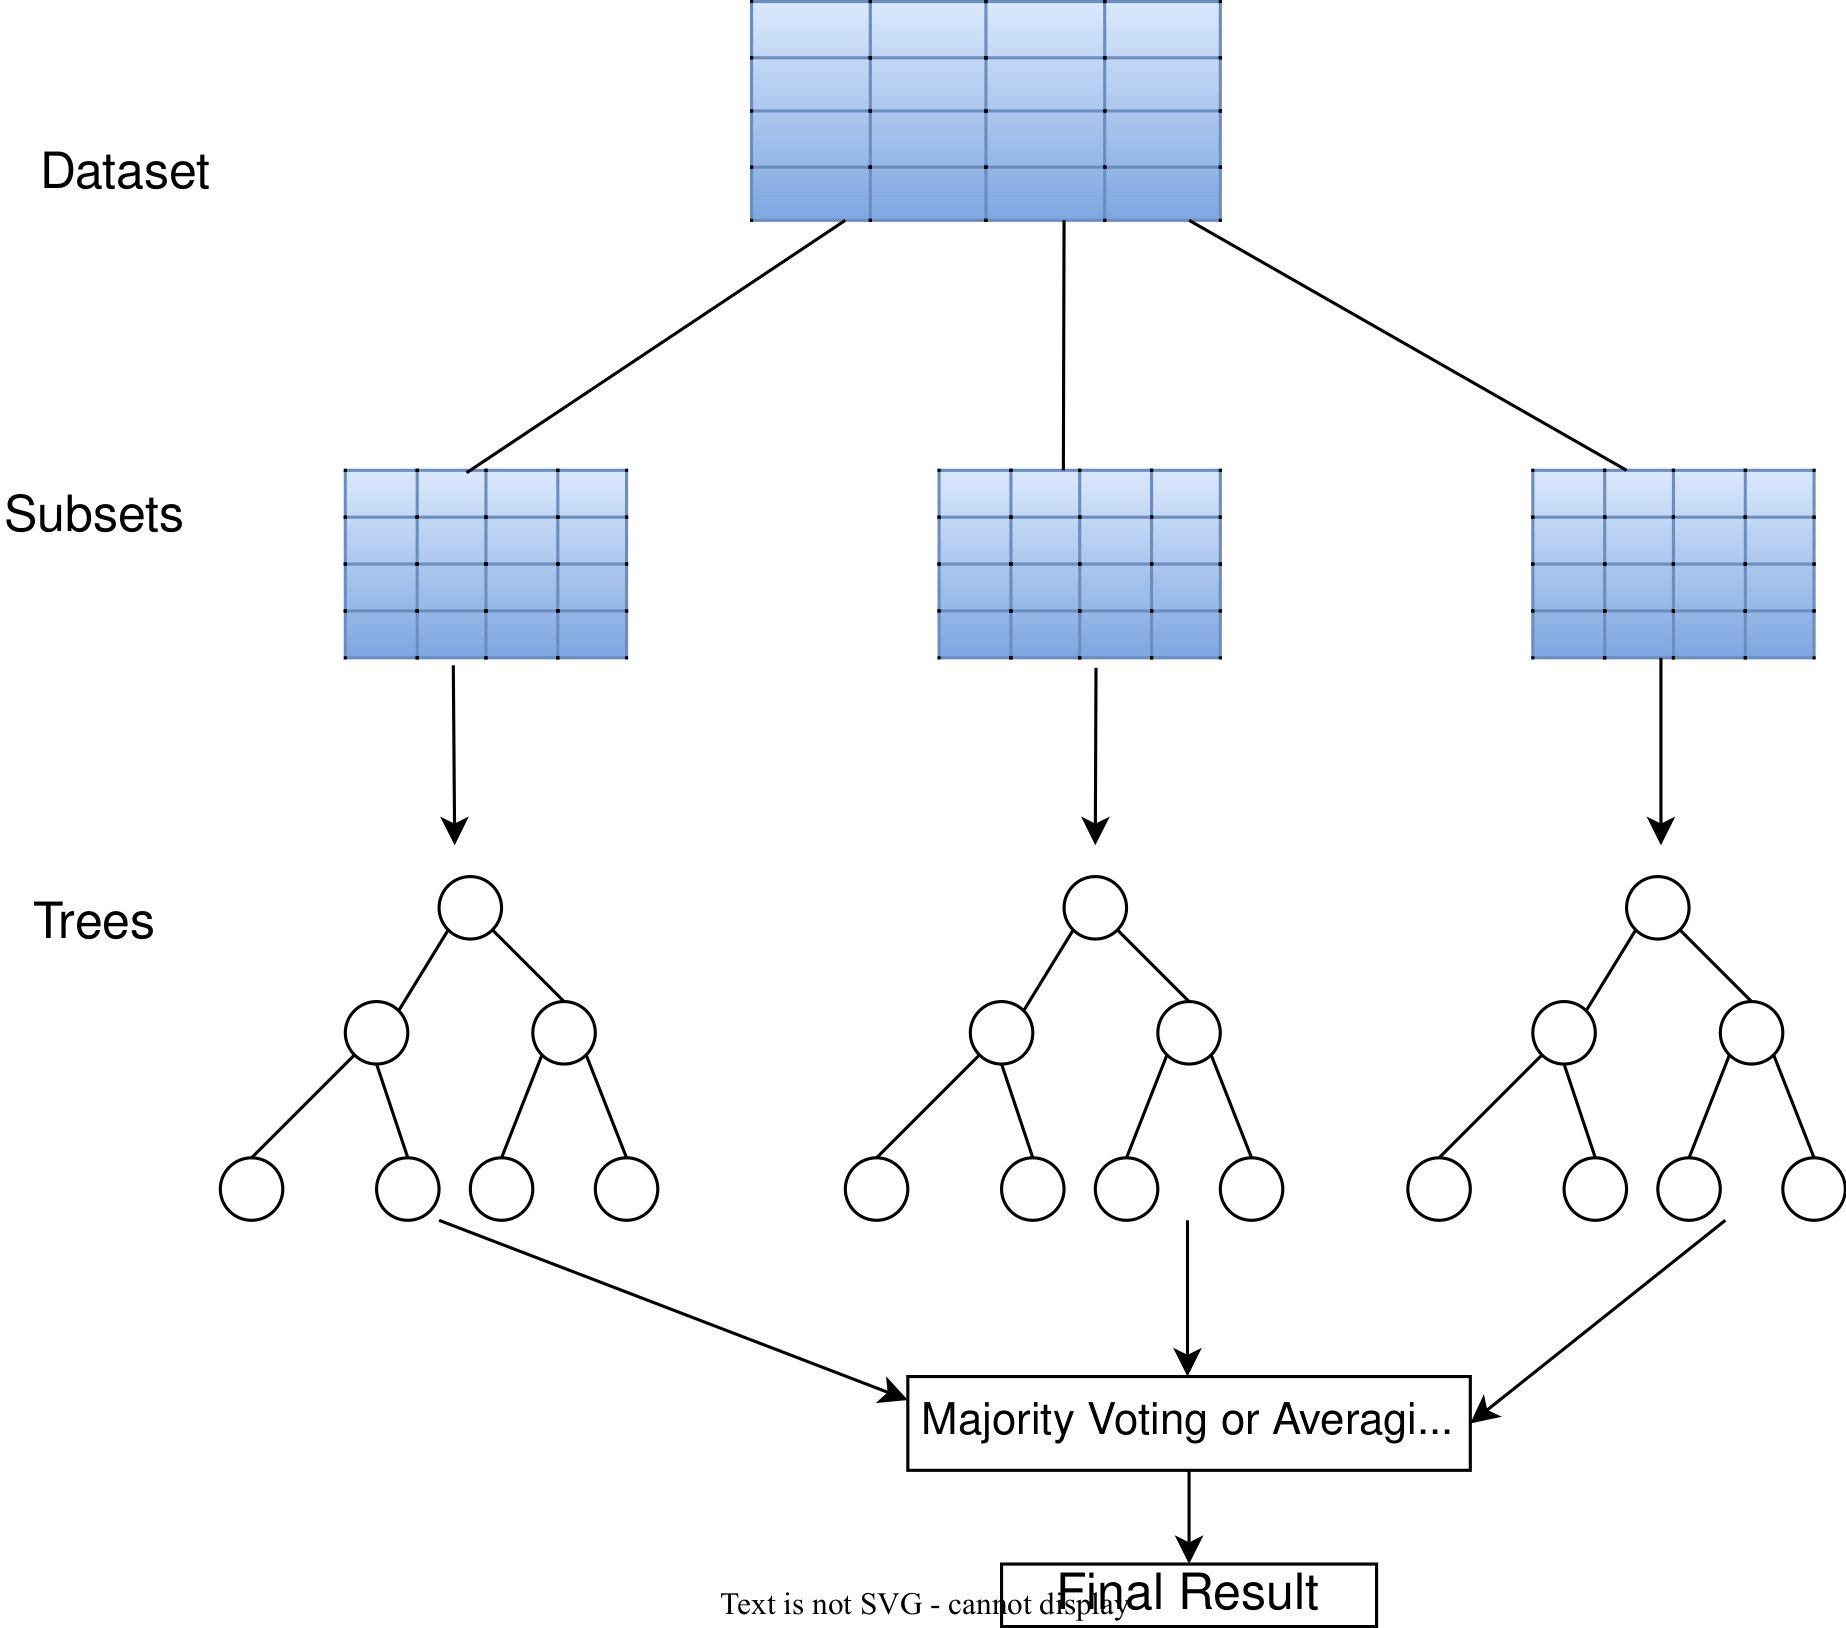

Extra tree is similar to Random forest, but the principle of operation is different.

In the extra tree, the column with the best STDR does not make the first decision, instead it is chosen randomly.

In the random forest, STD is first found on the target value, then STDR of the rest of the columns is found on the target value column, and finally the column with the highest result is the first to make a decision. In the extra tree, everything is chosen randomly. This saves us time when dealing with a lot of data because we don't have to spend time calculating STDs and STDRs.


In [1]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Datasets/DTree2.csv")
data

,Weather,Temp,Humidity,Wind,Players
0,Rainy,Hot,High,False,25
1,Rainy,Hot,High,True,30
2,Cloudy,Hot,High,False,46
3,Sunny,Good,High,False,45
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Cloudy,Cool,Normal,True,43
7,Rainy,Good,High,False,35
8,Rainy,Cool,Normal,False,38
9,Sunny,Cool,Normal,False,46


In [3]:
ordinal = OrdinalEncoder()

In [5]:
ordinal.fit(data.drop("Players", axis=1))

OrdinalEncoder()

In [6]:
data_x = ordinal.transform(data.drop("Players", axis=1))
data_x

array([[1., 2., 0., 0.],
       [1., 2., 0., 1.],
       [0., 2., 0., 0.],
       [2., 1., 0., 0.],
       [2., 0., 1., 0.],
       [2., 0., 1., 1.],
       [0., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [2., 0., 1., 0.],
       [1., 1., 1., 1.],
       [0., 1., 0., 1.],
       [0., 2., 1., 0.],
       [2., 1., 0., 1.]])

In [7]:
data_y = data["Players"].to_numpy()
data_y

array([25, 30, 46, 45, 52, 23, 43, 35, 38, 46, 48, 52, 44, 30],
      dtype=int64)

In [9]:
ext = ExtraTreesRegressor(n_estimators=5, max_depth=3)
# number of trees = 5, tree max_depth=3

In [10]:
ext.fit(data_x, data_y)

ExtraTreesRegressor(max_depth=3, n_estimators=5)

In [11]:
ext[0]
# 1 - tree

ExtraTreeRegressor(max_depth=3, random_state=1012668817)

In [12]:
ext[1]
# 2 - tree

ExtraTreeRegressor(max_depth=3, random_state=1441261278)

In [13]:
ext[2]
# 3 - tree

ExtraTreeRegressor(max_depth=3, random_state=649171941)

In [14]:
ext[3]
# 4 - tree

ExtraTreeRegressor(max_depth=3, random_state=600487457)

In [15]:
ext[4]
# 5 - tree

ExtraTreeRegressor(max_depth=3, random_state=678596468)

In [16]:
columns = ['Weather', 'Temp', 'Humidity', 'Wind']

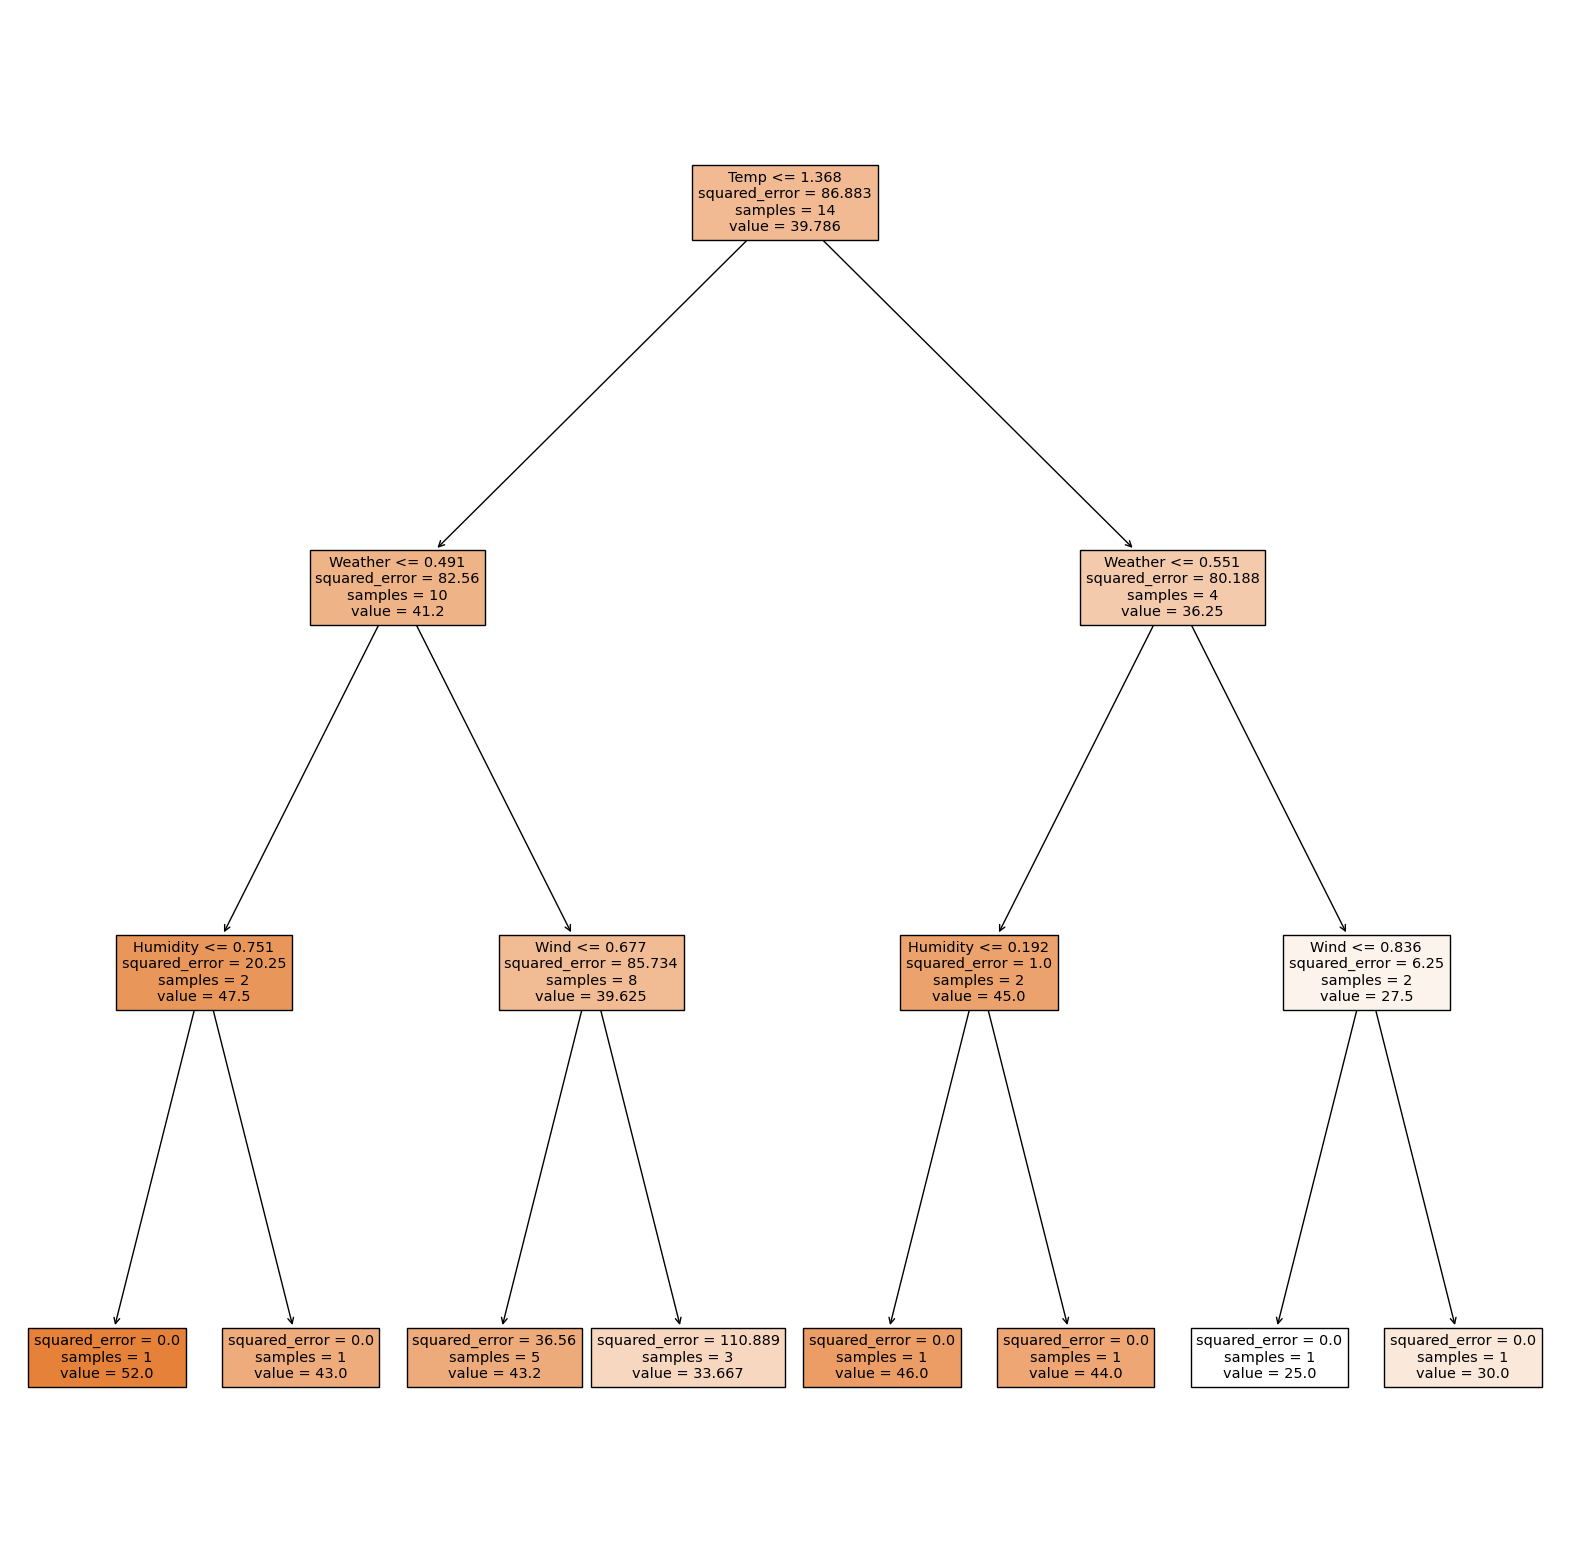

In [18]:
plt.figure(figsize=(20,20))
plot_tree(ext[0], feature_names=columns, filled=True)
plt.show()
# 1 - tree
# if we pay attention, like the decision tree, like the exact number wind<=0.5
# get a different number each time
# for example = weather<=0.491, wind<=0.677

# This is how EXTRA TREE works randomly.

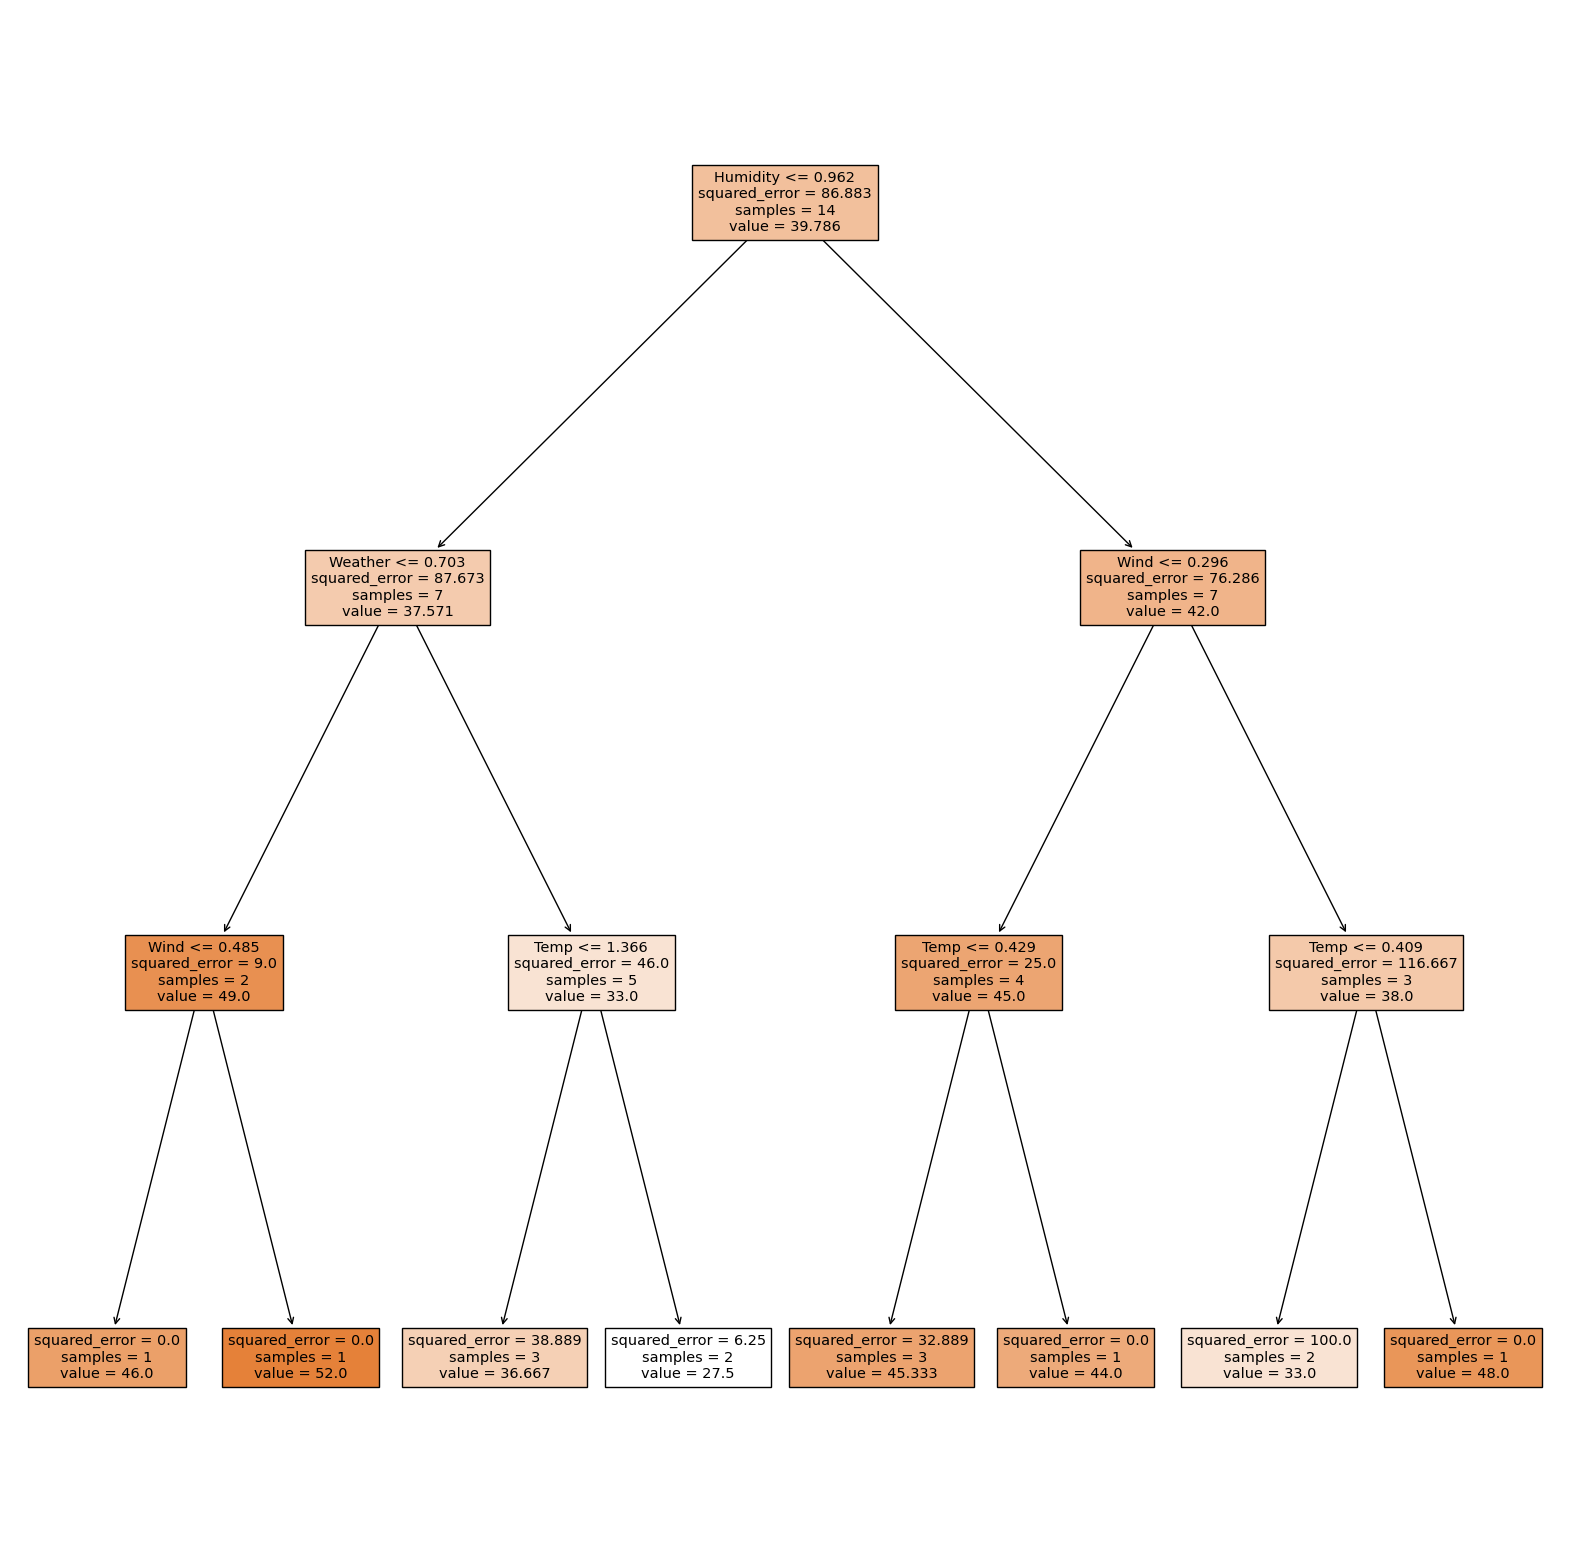

In [19]:
plt.figure(figsize=(20,20))
plot_tree(ext[1], feature_names=columns, filled=True)
plt.show()
# 2 - tree

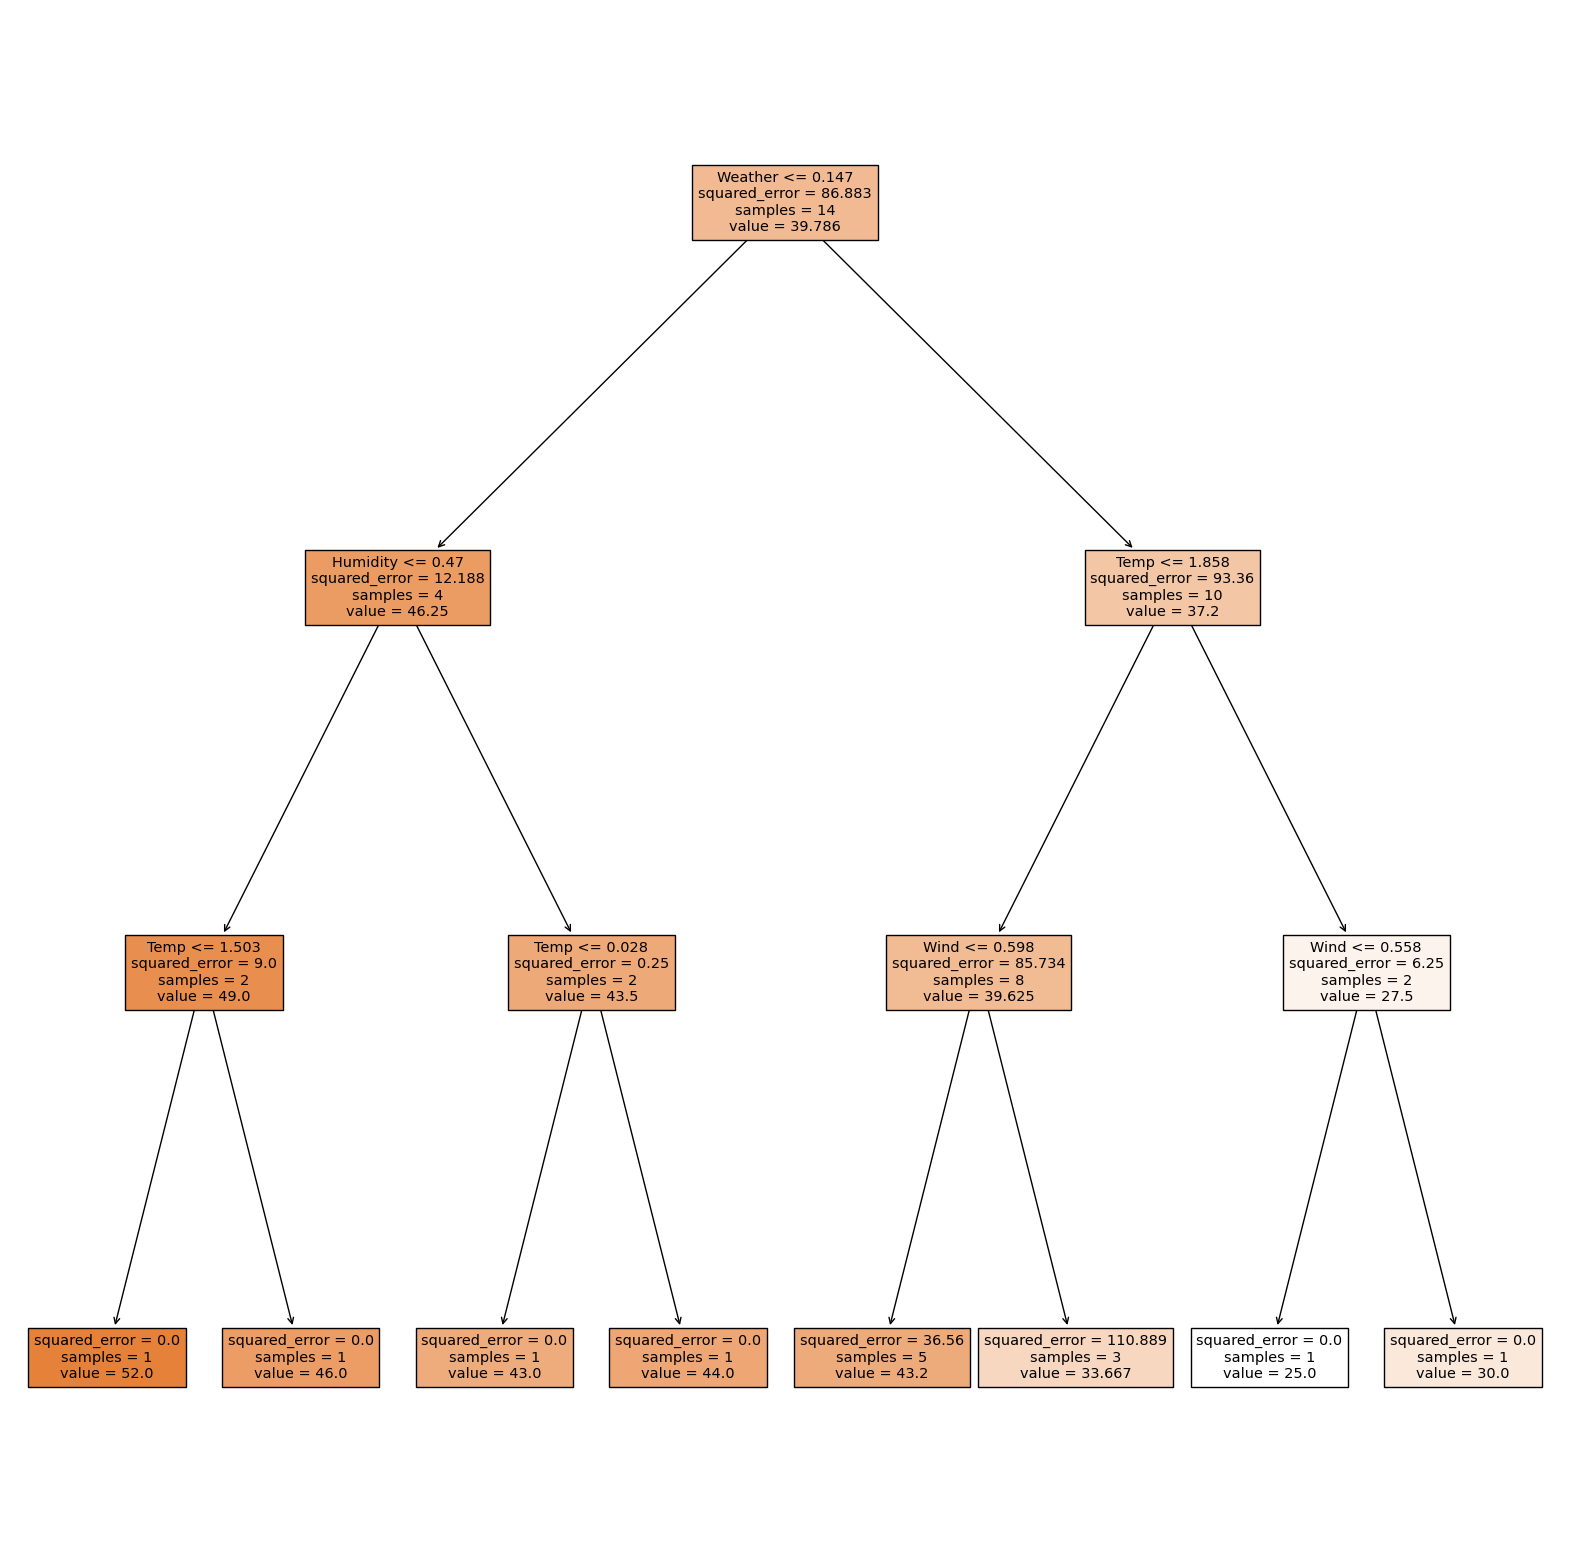

In [20]:
plt.figure(figsize=(20,20))
plot_tree(ext[2], feature_names=columns, filled=True)
plt.show()
# 3 - tree

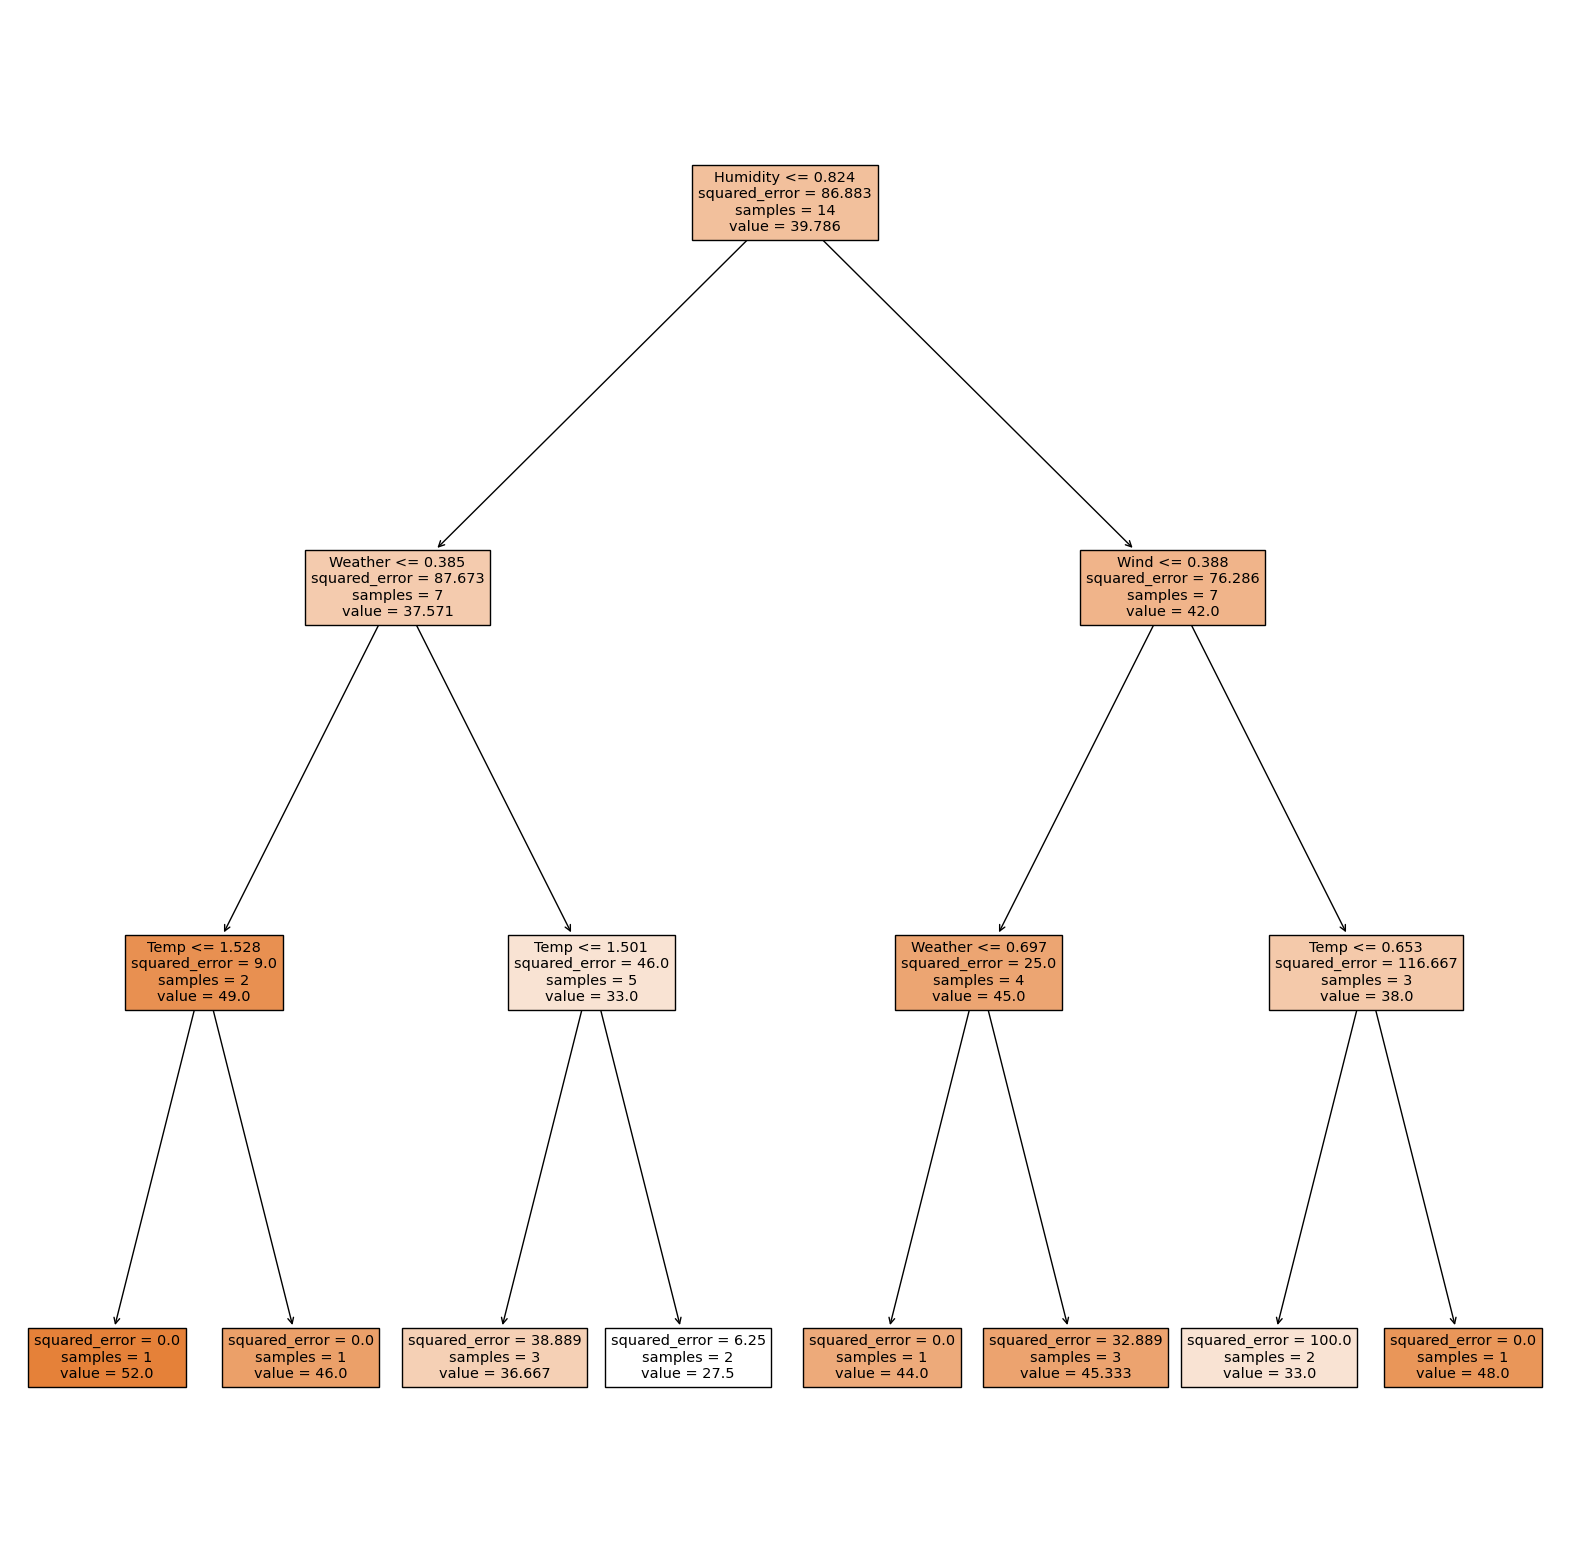

In [21]:
plt.figure(figsize=(20,20))
plot_tree(ext[3], feature_names=columns, filled=True)
plt.show()
# 4 - tree

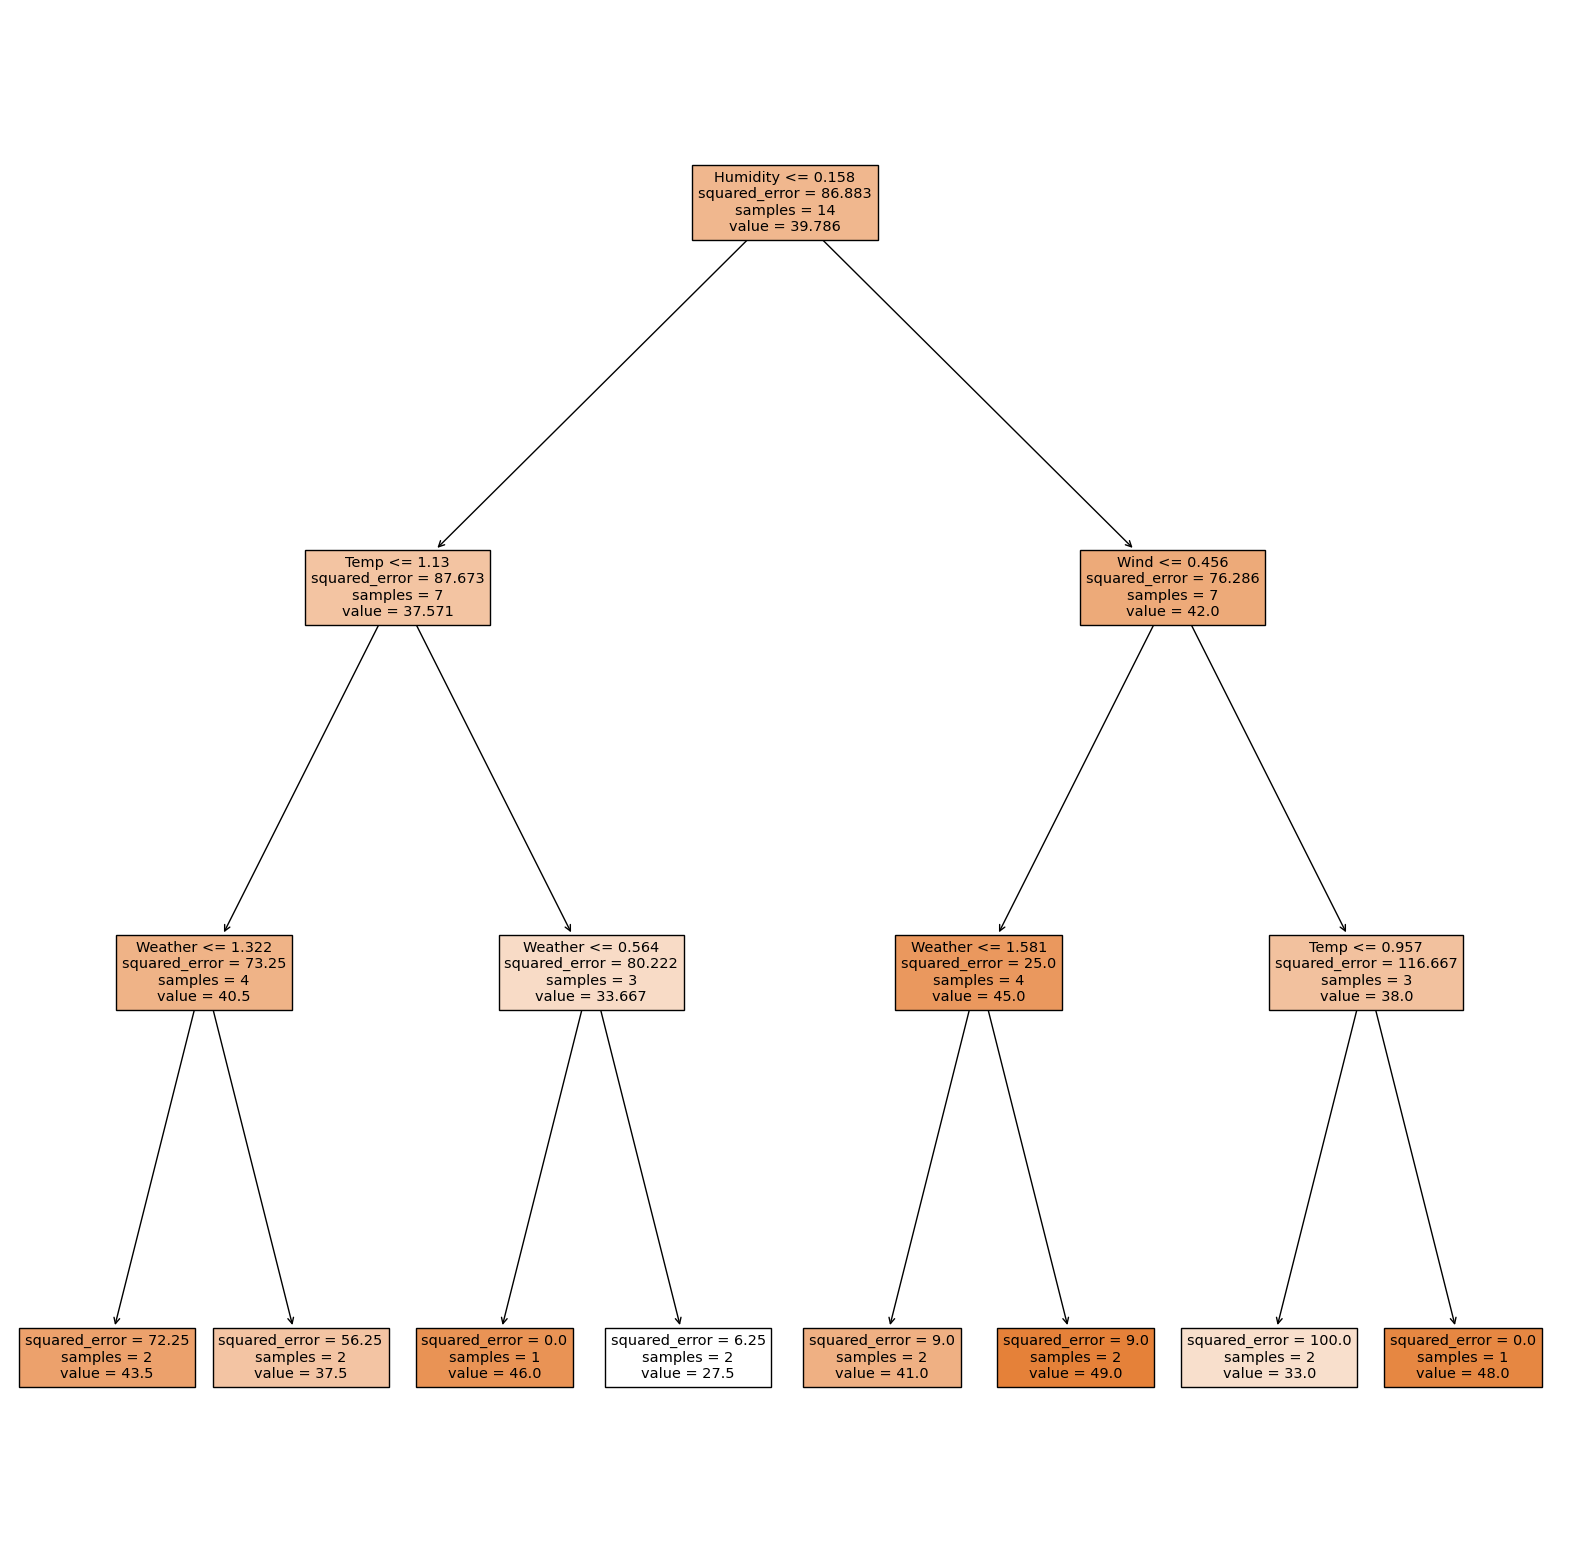

In [22]:
plt.figure(figsize=(20,20))
plot_tree(ext[4], feature_names=columns, filled=True)
plt.show()
# 5 - tree

In [31]:
ext[0].predict([[1,2,0,0]])
# 1 - Tree Prophecy

array([25.])

In [32]:
ext[1].predict([[1,2,0,0]])
# 2 - Tree Prophecy

array([27.5])

In [33]:
ext[2].predict([[1,2,0,0]])
# 3 - Tree Prophecy

array([25.])

In [34]:
ext[3].predict([[1,2,0,0]])
# 4 - Tree Prophecy

array([27.5])

In [35]:
ext[4].predict([[1,2,0,0]])
# 5 - Tree Prophecy

array([27.5])

In [37]:
(25 + 27.5 + 25 + 27.5 + 27.5)/5
# So if it's a regression, the average of all predictions is taken at the end
# If there is a classification, it will be predicted by voting at the end

26.5

In [38]:
ext.predict([[1,2,0,0]])
# Our general prediction. 
# Not great because we have a small dataset

array([26.5])

# <center> <h1> 👨‍💻   🚀  